# Jobs and Salaries in Data Science - EDA e Data Visualization

Neste projeto será realizado o processo de Análise Exploratória de Dados (Exploratory Data Analysis) a partir do dataset Jobs and Salaries in Data Science que pode ser encontrado no [Kaggle](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data) e foi disponibilizado por [Hummaam Qaasim](https://www.kaggle.com/hummaamqaasim) em 2024.

# 1. Definindo a tarefa de negócios

Como iniciante na área, entender a progressão da carreira dentro de Data Science é muito importante. Durante e pós a pandemia de COVID-19 houve um crescimento das oportunidades de trabalhar de forma remota ou híbrida e este foi outro fator que me atraiu a buscar essa transição de carreira, além da possibilidade de ingressar no futuro em posições que me coloquem em outro país.

Com este conjunto de dados, meu objetivo é entender alguns pontos sobre o ambiente de trabalho em Data Science:

* Qual a progressão de remuneração que profissionais de Data Science tem?
* Qual a distribuição de vagas de acordo com o nível de experiência?
* Quais áreas de Data Science tem os melhores salários?
* Maioria das vagas são presenciais ou remotas?
* Quais países contratam mais profissionais de Data Science?
* Pequenas empresas remuneram bem os profissionais do setor?


# 2. Preparando o ambiente

## 2.1. Carregando as bibliotecas e os dados que serão utilizados

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
url = 'https://raw.githubusercontent.com/andreluizls1/jobs_ds/main/jobs_in_data.csv'
df = pd.read_csv(url)

## 2.2. Verificando os dados

In [330]:
# Primeiro vou checar o tamanho do dataset

df.shape

(9355, 12)

In [331]:
# Então vou checar como os dados são preenchidos usando head()

df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [332]:
# E também um tail()

df.tail()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S
9354,2020,Business Data Analyst,Data Analysis,USD,100000,100000,United States,Entry-level,Contract,Remote,United States,L


In [333]:
# Foi possível apenas com o head() e tail() ver todas as colunas
# Vou agora ver os preenchimentos únicos das colunas

for col in df.columns:
  print(f'Coluna: {col}')
  print(df[col].unique())
  print('-' * 30)

Coluna: work_year
[2023 2022 2020 2021]
------------------------------
Coluna: job_title
['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' 'Data Integration Engineer'
 'Business Intelligence Manager' 'Data Integration Specialist'
 'Data Science Practitioner' 'Business Intelligence Developer'
 'AI Research En

In [334]:
# E também os tipos de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


> Foi possível observar que os dados não precisam de processos de limpeza e manipulação.

# 3. Analisando os dados

## 3.1. A distribuição dos dados

In [335]:
#  Quais as 10 categorias com mais profissionais?

cat = df['job_category'].value_counts()
cat_count = pd.DataFrame({'job_category': cat.index, 'count': cat.values})
cat_count.head(10)

,job_category,count
0,Data Science and Research,3014
1,Data Engineering,2260
2,Data Analysis,1457
3,Machine Learning and AI,1428
4,Leadership and Management,503
5,BI and Visualization,313
6,Data Architecture and Modeling,259
7,Data Management and Strategy,61
8,Data Quality and Operations,55
9,Cloud and Database,5


In [336]:
# Quais as 10 posições com mais profissionais?

jobs = df['job_title'].value_counts()
jobs_count = pd.DataFrame({'job_title': jobs.index, 'count': jobs.values})
jobs_count.head(10)

,job_title,count
0,Data Engineer,2195
1,Data Scientist,1989
2,Data Analyst,1388
3,Machine Learning Engineer,991
4,Applied Scientist,272
5,Research Scientist,269
6,Analytics Engineer,256
7,Data Architect,213
8,Business Intelligence Engineer,144
9,Research Engineer,144


In [337]:
# Como está distribuido o nível dos profissionais?

level = round((df['experience_level'].value_counts(normalize = True) * 100), 2)
level_count = pd.DataFrame({'experience_level': level.index, '(%)': level.values})
level_count.head()

,experience_level,(%)
0,Senior,71.72
1,Mid-level,19.98
2,Entry-level,5.30
3,Executive,3.00


In [338]:
# Quais os países que tem mais profissionais de Data Science?

res = df['employee_residence'].value_counts()
res_count = pd.DataFrame({'employee_residence': res.index, 'count': res.values})
res_count.head(10)

,employee_residence,count
0,United States,8086
1,United Kingdom,442
2,Canada,224
3,Spain,117
4,Germany,66
5,France,54
6,Portugal,26
7,Netherlands,21
8,Australia,21
9,Italy,20


In [339]:
# Como estão distribuidos os empregos em relação a modelo de trabalho?

tipos = pd.crosstab(df['employment_type'],
                    df['work_setting'])
tipos

work_setting,Hybrid,In-person,Remote
employment_type,,,
Contract,2,1,16
Freelance,3,2,6
Full-time,180,5725,3405
Part-time,6,2,7


In [340]:
setting = round((df['work_setting'].value_counts(normalize = True) * 100), 2)
setting_count = pd.DataFrame({'work_setting': setting.index, '(%)': setting.values})
setting_count.head()

,work_setting,(%)
0,In-person,61.25
1,Remote,36.71
2,Hybrid,2.04


### Breves conclusões

Observando so dados, algumas áreas que não conheço bem me chamaram atenção que são as de arquitetura e engenharia de dados. Existem muitas vagas remotas, e isso é interessante apesar da maioria ainda ser presencial.

## 3.2. A tendência central dos dados

In [341]:
# Usando describe para entender as variáveis contínuas

df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [342]:
# Quais categorias pagam os melhores salários em média?

sal_cat = df.groupby('job_category')['salary_in_usd'].mean().sort_values(ascending = False)
cat_mean = pd.DataFrame({'job_category': sal_cat.index, 'mean_salary(usd)': sal_cat.values})
cat_mean

,job_category,mean_salary(usd)
0,Machine Learning and AI,178925.847339
1,Data Science and Research,163758.575979
2,Data Architecture and Modeling,156002.359073
3,Cloud and Database,155000.000000
4,Data Engineering,146197.656195
5,Leadership and Management,145476.019881
6,BI and Visualization,135092.102236
7,Data Analysis,108505.721345
8,Data Management and Strategy,103139.934426
9,Data Quality and Operations,100879.472727


In [343]:
# Quais as 10 posições pagam os melhores salários?

sal_job = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)
job_mean = pd.DataFrame({'job_title': sal_job.index, 'mean_salary(usd)': sal_job.values})
job_mean.head(10)

,job_title,mean_salary(usd)
0,Analytics Engineering Manager,399880.000000
1,Data Science Tech Lead,375000.000000
2,Managing Director Data Science,300000.000000
3,Head of Machine Learning,259000.000000
4,AWS Data Architect,258000.000000
5,AI Architect,250328.000000
6,Cloud Data Architect,250000.000000
7,Director of Data Science,221365.034483
8,Machine Learning Software Engineer,212907.692308
9,Head of Data,211186.545455


In [344]:
# Qual a progressão de média salarial de acordo com o nível?

sal = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending = False)
sal_mean = pd.DataFrame({'experience_level': sal.index, 'mean_salary(usd)': sal.values})
sal_mean

,experience_level,mean_salary(usd)
0,Executive,189462.914591
1,Senior,162356.126099
2,Mid-level,117523.918138
3,Entry-level,88534.776210


In [345]:
# Como as empresas remuneram em média de acordo com o seu tamanho

org = df.groupby('company_size')['salary_in_usd'].mean()
org_mean = pd.DataFrame({'company_size': org.index, 'mean_salary(usd)': org.values})
org_mean

,company_size,mean_salary(usd)
0,L,141097.163102
1,M,152237.089252
2,S,90642.597484


In [346]:
# Qual a média salarial de acordo com o regime de trabalho?

trab = df.groupby('work_setting')['salary_in_usd'].mean()
trab_mean = pd.DataFrame({'work_setting': trab.index, 'mean_salary(usd)': trab.values})
trab_mean

,work_setting,mean_salary(usd)
0,Hybrid,88912.287958
1,In-person,155524.120942
2,Remote,144996.016599


In [347]:
# Qual a média salarial ao longo dos anos?

ano = df.groupby('work_year')['salary_in_usd'].mean()
ano_mean = pd.DataFrame({'work_year': ano.index, 'mean_salary(usd)': ano.values})
ano_mean

,work_year,mean_salary(usd)
0,2020,105878.859155
1,2021,106483.644670
2,2022,135467.501836
3,2023,155132.591708


### Breves conclusões

Mais uma vez posições dentro de engenharia de dados me chamaram atenção. Também é bom ver que a média salarial nas posições iniciais e de análise de dados é boa para o que almejo.

# 4. Compartilhar: visualizando os resultados

In [348]:
# Uma pequena configuração para melhorar as visualizações

sns.set_style('darkgrid')

## 4.1. Observando a distribuição dos salários com um histograma

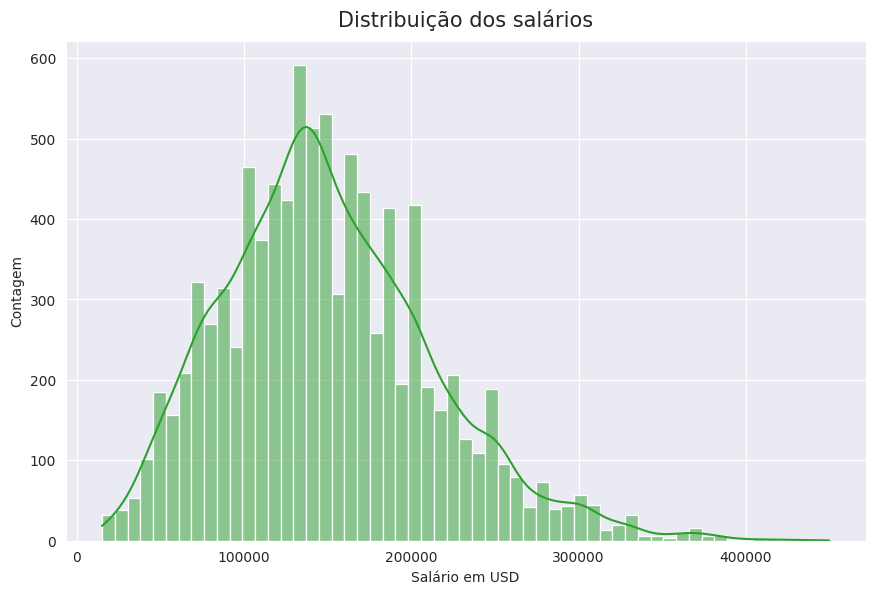

In [349]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.histplot(data = df,
             x = df['salary_in_usd'],
             kde = True,
             color = 'tab:green')
ax.set_title('Distribuição dos salários',
             fontsize = 15, pad = 10)
ax.set_xlabel('Salário em USD',
              fontsize = 10)
ax.set_ylabel('Contagem',
              fontsize = 10)
plt.show()

## 4.2. Boxplots: observando medidas de tendência e valores extremos

<ipython-input-350-8c866ca89edf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'salary_in_usd',


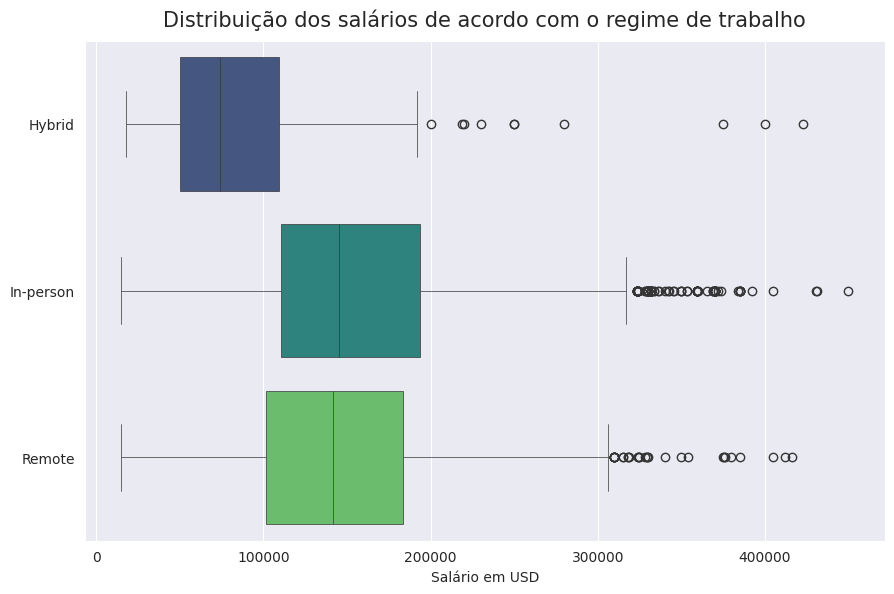

In [350]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(data = df, x = 'salary_in_usd',
            y = 'work_setting',
            palette = 'viridis',
            linewidth = 0.5)
ax.set_title('Distribuição dos salários de acordo com o regime de trabalho',
             fontsize = 15,
             pad = 10)
ax.set_xlabel('Salário em USD',
              fontsize = 10)
ax.set_ylabel('')
plt.show()

<ipython-input-351-ddde78b1d2df>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'salary_in_usd',


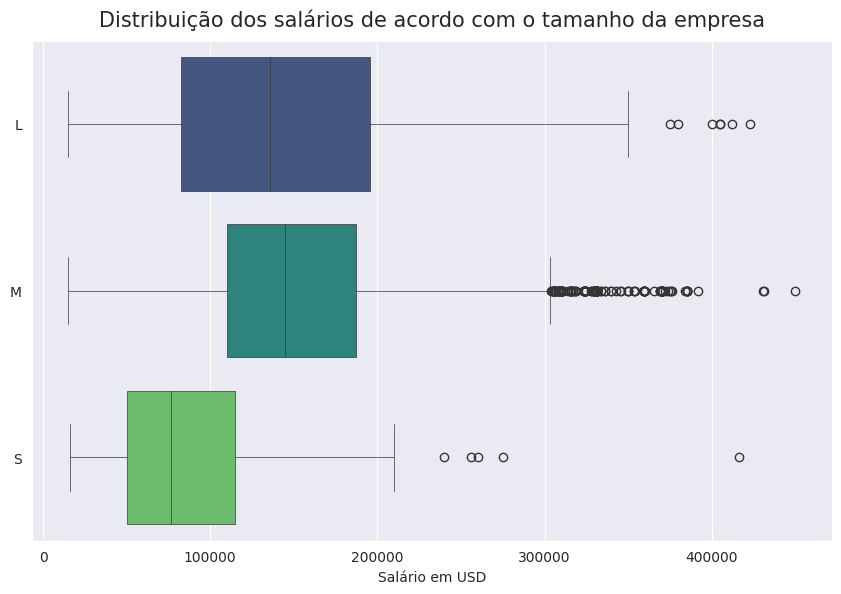

In [351]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(data = df, x = 'salary_in_usd',
            y = 'company_size',
            palette = 'viridis',
            linewidth = 0.5)
ax.set_title('Distribuição dos salários de acordo com o tamanho da empresa',
             fontsize = 15, pad = 10)
ax.set_xlabel('Salário em USD',
              fontsize = 10)
ax.set_ylabel('')
plt.show()

<ipython-input-352-4957e11c5d13>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'salary_in_usd',


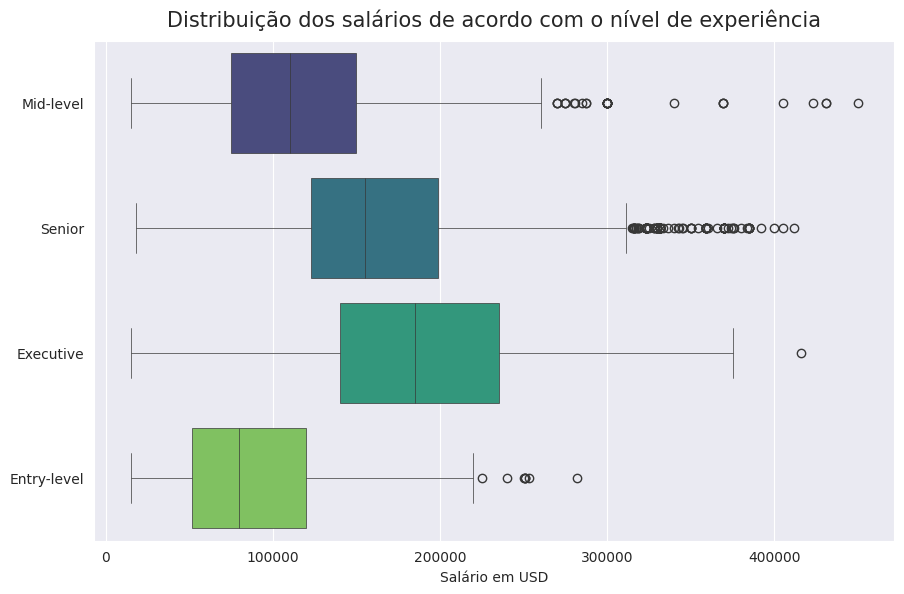

In [352]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(data = df, x = 'salary_in_usd',
            y = 'experience_level',
            palette = 'viridis',
            linewidth = 0.5,)
ax.set_title('Distribuição dos salários de acordo com o nível de experiência',
             fontsize = 15, pad = 10)
ax.set_xlabel('Salário em USD',
              fontsize = 10)
ax.set_ylabel('')
plt.show()

## 4.3. Observando posições e salários atráves de barras e linhas

<ipython-input-353-d4393a2fb748>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = cat_mean,


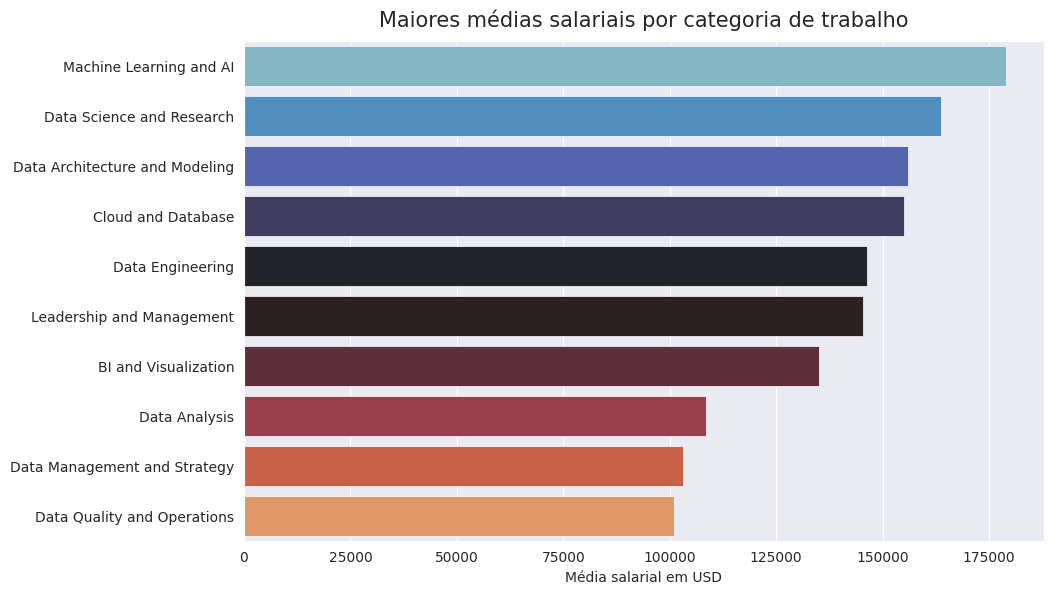

In [353]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(data = cat_mean,
            x = 'mean_salary(usd)',
            y = 'job_category',
            palette = 'icefire',
            linewidth = 0.5)
ax.set_title('Maiores médias salariais por categoria de trabalho',
             fontsize = 15, pad = 10)
ax.set_xlabel('Média salarial em USD',
              fontsize = 10)
ax.set_ylabel('')
plt.show()

<ipython-input-354-622dd0efce05>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = job_mean.head(10),


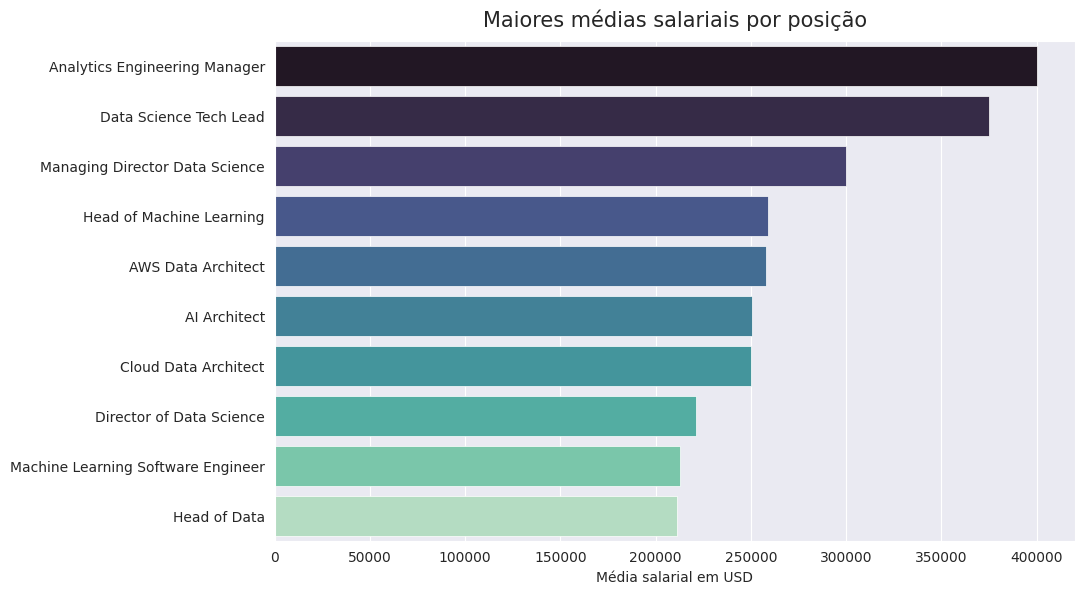

In [354]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(data = job_mean.head(10),
            x = 'mean_salary(usd)',
            y = 'job_title',
            palette = 'mako',
            linewidth = 0.5)
ax.set_title('Maiores médias salariais por posição',
             fontsize = 15, pad = 10)
ax.set_xlabel('Média salarial em USD',
              fontsize = 10)
ax.set_ylabel('')
plt.show()

<ipython-input-355-7e5d55334984>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = res_count.head(10),


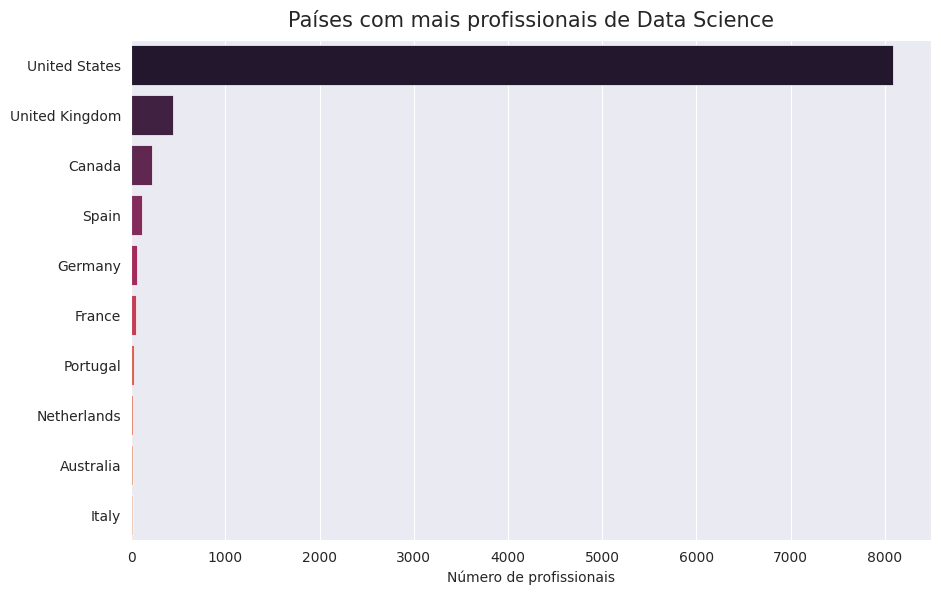

In [355]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(data = res_count.head(10),
            x = 'count',
            y = 'employee_residence',
            palette = 'rocket',
            linewidth = 0.5)
ax.set_title('Países com mais profissionais de Data Science',
             fontsize = 15, pad = 10)
ax.set_xlabel('Número de profissionais',
              fontsize = 10)
ax.set_ylabel('')
plt.show()

<ipython-input-356-635aa7205e0b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = res_count[res_count['employee_residence'] != 'United States'].head(10),


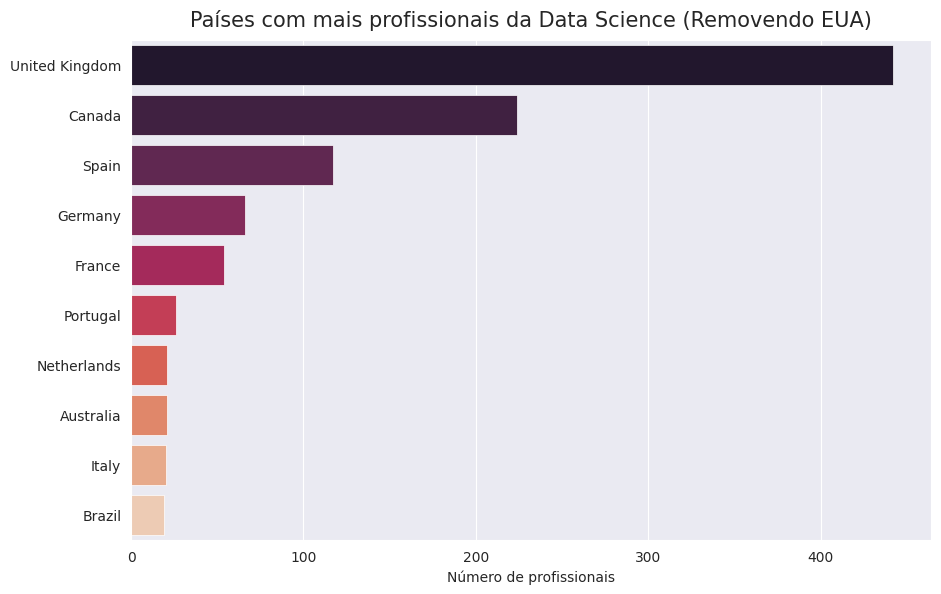

In [356]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(data = res_count[res_count['employee_residence'] != 'United States'].head(10),
            x = 'count',
            y = 'employee_residence',
            palette = 'rocket',
            linewidth = 0.5)
ax.set_title('Países com mais profissionais da Data Science (Removendo EUA)',
             fontsize = 15, pad = 10)
ax.set_xlabel('Número de profissionais',
              fontsize = 10)
ax.set_ylabel('')
plt.show()

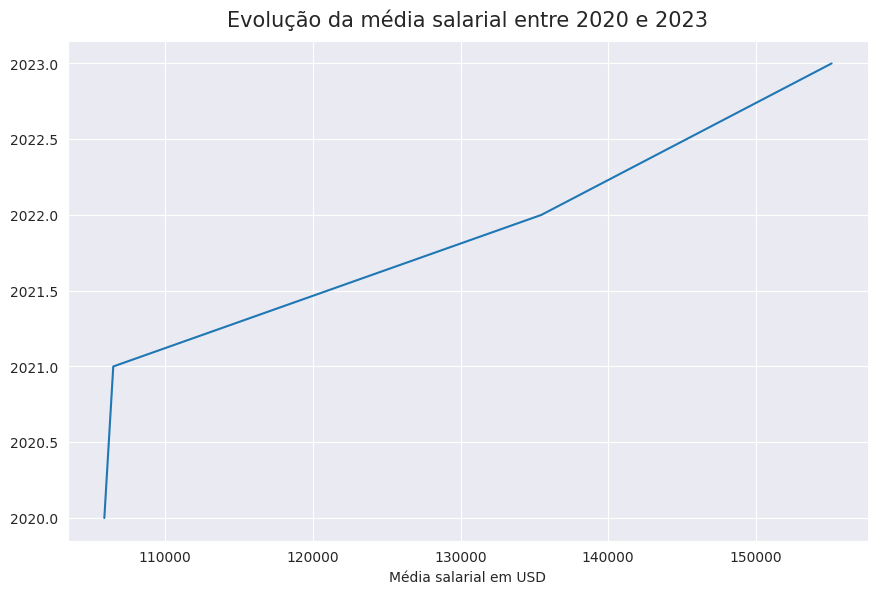

In [357]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.lineplot(data = ano_mean,
             x = 'mean_salary(usd)',
             y = 'work_year')
ax.set_title('Evolução da média salarial entre 2020 e 2023',
             fontsize = 15, pad = 10)
ax.set_xlabel('Média salarial em USD',
              fontsize = 10)
ax.set_ylabel('')
plt.show()

# 5. Conclusões

* Venho um ambiente profissional bastante competitivo e volátil, o setor imobiliário e de construção cívil é bastante dependente dos ciclos financeiros do país, e isso sempre me fez precisar e sempre buscar analisar o momento certo de focar em certo produto. Além disso durante minha graduação em Egenharia de Produção as cadeiras mais análiticas sempre me interessaram mais como engenharia economica, todas ligadas a logística e supply chain magement, controle de qualidade e etc. Após uma pausa forçada por questões financeiras e a pandemia de COVID-19 consegui conluir meu bacharelado em 2023;


* A área de dados me surgiu como um caminho claro, e por isso estou buscando essa transição de carreira. Analisando ostes dados é possível observar alguns fatores que podem desanimar um pouco como o fato de apenas 5% dos profissionais contratados estarem em níveis íniciais;

* Os layoffs também são um fator que assustam um pouco ao tentar entrar na área, mas é possível observar diversos outliers que na minha leitura indicam que os salários de novos contratados devem se manter próximo a média atual. Mas posições executivas e de maior responsabilidade passaram por quedas salariais;

* Mesmo após o fim da pandemia de COVID-19 o trabalho remoto se mantém com 36,71% das posições, o que é interessante. Os EUA e Países da Europa são onde se encontram maioria das vagas dentro do conjunto de dados;

* Entrando agora na área tinha mais conhecimento e interesse em Análise de Dados e Ciência de Dados com foco em Machine Learning, mas a análise desses dados me causou curiosidade e interesse sobre a área de Engenharia e  Arquitetura de Dados, são bons salários e vários empregos;

* Continuo animado e seguro que meu próximo passo é transicionar para a área de dados.

